<a href="https://colab.research.google.com/github/jssaini7815/Gradient-Descent-/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Numerical Optimization for Logistic Regression.



Follow the Machine Learing pipeline to complete the test.

# 1. Data processing

- Download the Diabete dataset from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes
- Load the data using sklearn.
- Preprocess the data.

## 1.1. Load the data

In [ ]:
from sklearn import datasets
import numpy

x_sparse, y = datasets.load_svmlight_file('diabetes')
x = x_sparse.todense()

print('Shape of x: ' + str(x.shape))
print('Shape of y: ' + str(y.shape))

## 1.2. Partition to training and test sets

In [ ]:
# partition the data to training and test sets
n = x.shape[0]
n_train = 640
n_test = n - n_train

rand_indices = numpy.random.permutation(n)
train_indices = rand_indices[0:n_train]
test_indices = rand_indices[n_train:n]

x_train = x[train_indices, :]
x_test = x[test_indices, :]
y_train = y[train_indices].reshape(n_train, 1)
y_test = y[test_indices].reshape(n_test, 1)

print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (640, 8)
Shape of x_test: (128, 8)
Shape of y_train: (640, 1)
Shape of y_test: (128, 1)


## 1.3. Feature scaling

Use the standardization to transform both training and test features

In [ ]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[[ 0.05334084  0.08088802 -0.02770141 -0.10906498 -0.02783957  0.10277847
   0.02440334  0.02003912]]
test std = 
[[1.09871194 0.91199817 1.35916329 1.05256002 0.95829529 0.96946344
  0.97919333 0.98894056]]


## 1.4. Add a dimension of all ones

In [ ]:
n_train, d = x_train.shape
x_train = numpy.concatenate((x_train, numpy.ones((n_train, 1))), axis=1)

n_test, d = x_test.shape
x_test = numpy.concatenate((x_test, numpy.ones((n_test, 1))), axis=1)

print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))

Shape of x_train: (640, 9)
Shape of x_test: (128, 9)


# 2. Logistic regression model

The objective function is $Q (w; X, y) = \frac{1}{n} \sum_{i=1}^n \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

In [ ]:
# Calculate the objective function value
# Inputs:
#     w: d-by-1 matrix
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     objective function value (scalar)
def objective(w, x, y, lam):
    n, d = x.shape
    yx = numpy.multiply(y, x) # n-by-d matrix
    yxw = numpy.dot(yx, w) # n-by-1 matrix
    vec1 = numpy.exp(-yxw) # n-by-1 matrix
    vec2 = numpy.log(1 + vec1) # n-by-1 matrix
    loss = numpy.mean(vec2) # scalar
    reg = lam / 2 * numpy.sum(w * w) # scalar
    return loss + reg
    

In [ ]:
# initialize w
d = x_train.shape[1]
w = numpy.zeros((d, 1))

# evaluate the objective function value at w
lam = 1E-6
objval0 = objective(w, x_train, y_train, lam)
print('Initial objective function value = ' + str(objval0))

Initial objective function value = 0.6931471805599453


# 3. Numerical optimization

## 3.1. Gradient descent


The gradient at $w$ is $g = - \frac{1}{n} \sum_{i=1}^n \frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$

In [ ]:
# Calculate the gradient
# Inputs:
#     w: d-by-1 matrix
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     g: g: d-by-1 matrix, full gradient
def gradient(w, x, y, lam):
    n, d = x.shape
    yx = numpy.multiply(y, x) # n-by-d matrix
    yxw = numpy.dot(yx, w) # n-by-1 matrix
    vec1 = numpy.exp(yxw) # n-by-1 matrix
    vec2 = numpy.divide(yx, 1+vec1) # n-by-d matrix
    vec3 = -numpy.mean(vec2, axis=0).reshape(d, 1) # d-by-1 matrix
    g = vec3 + lam * w
    return g

In [ ]:
# Gradient descent for solving logistic regression
# Inputs:
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     stepsize: scalar
#     max_iter: integer, the maximal iterations
#     w: d-by-1 matrix, initialization of w
# Return:
#     w: d-by-1 matrix, the solution
#     objvals: a record of each iteration's objective value
def grad_descent(x, y, lam, stepsize, max_iter=100, w=None):
    n, d = x.shape
    objvals = numpy.zeros(max_iter) # store the objective values
    if w is None:
        w = numpy.zeros((d, 1)) # zero initialization
    
    for t in range(max_iter):
        objval = objective(w, x, y, lam)
        objvals[t] = objval
        print('Objective value at t=' + str(t) + ' is ' + str(objval))
        g = gradient(w, x, y, lam)
        w -= stepsize * g
    
    return w, objvals

Run gradient descent.

In [ ]:
lam = 1E-6
stepsize = 1.0
w, objvals_gd = grad_descent(x_train, y_train, lam, stepsize)

Objective value at t=0 is 0.6931471805599453
Objective value at t=1 is 0.5953201579890982
Objective value at t=2 is 0.5532679270859522
Objective value at t=3 is 0.530238844967651
Objective value at t=4 is 0.5157857926649199
Objective value at t=5 is 0.5059859957395125
Objective value at t=6 is 0.49901052223591175
Objective value at t=7 is 0.49387662076532207
Objective value at t=8 is 0.49000361573059736
Objective value at t=9 is 0.48702507491985836
Objective value at t=10 is 0.48469851310294204
Objective value at t=11 is 0.4828576051691597
Objective value at t=12 is 0.4813849940315961
Objective value at t=13 is 0.4801959381620227
Objective value at t=14 is 0.47922804649859563
Objective value at t=15 is 0.47843461056314346
Objective value at t=16 is 0.47778015016031833
Objective value at t=17 is 0.47723736673524686
Objective value at t=18 is 0.4767850166595231
Objective value at t=19 is 0.4764063998351375
Objective value at t=20 is 0.47608826827248996
Objective value at t=21 is 0.475820

## 3.2. Stochastic gradient descent (SGD)

Define $Q_i (w) = \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $.

The stochastic gradient at $w$ is $g_i = \frac{\partial Q_i }{ \partial w} = -\frac{y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

In [ ]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: d-by-1 matrix
#     xi: 1-by-d matrix
#     yi: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def stochastic_objective_gradient(w, xi, yi, lam):
    d = xi.shape[0]
    yx = yi * xi # 1-by-d matrix
    yxw = float(numpy.dot(yx, w)) # scalar
    
    # calculate objective function Q_i
    loss = numpy.log(1 + numpy.exp(-yxw)) # scalar
    reg = lam / 2 * numpy.sum(w * w) # scalar
    obj = loss + reg
    
    # calculate stochastic gradient
    g_loss = -yx.T / (1 + numpy.exp(yxw)) # d-by-1 matrix
    g = g_loss + lam * w # d-by-1 matrix
    
    return obj, g

In [ ]:
# SGD for solving logistic regression
# Inputs:
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     stepsize: scalar
#     max_epoch: integer, the maximal epochs
#     w: d-by-1 matrix, initialization of w
# Return:
#     w: the solution
#     objvals: record of each iteration's objective value
def sgd(x, y, lam, stepsize, max_epoch=100, w=None):
    n, d = x.shape
    objvals = numpy.zeros(max_epoch) # store the objective values
    if w is None:
        w = numpy.zeros((d, 1)) # zero initialization
    
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = numpy.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        
        objval = 0 # accumulate the objective values
        for i in range(n):
            xi = x_rand[i, :] # 1-by-d matrix
            yi = float(y_rand[i, :]) # scalar
            obj, g = stochastic_objective_gradient(w, xi, yi, lam)
            objval += obj
            w -= stepsize * g
        
        stepsize *= 0.9 # decrease step size
        objval /= n
        objvals[t] = objval
        print('Objective value at epoch t=' + str(t) + ' is ' + str(objval))
    
    return w, objvals

Run SGD.

In [ ]:
lam = 1E-6
stepsize = 0.1
w, objvals_sgd = sgd(x_train, y_train, lam, stepsize)

Objective value at epoch t=0 is 0.5319367137281545
Objective value at epoch t=1 is 0.517573724797173
Objective value at epoch t=2 is 0.5241644619251502
Objective value at epoch t=3 is 0.5054346725251514
Objective value at epoch t=4 is 0.5110384255390952
Objective value at epoch t=5 is 0.5121521000850876
Objective value at epoch t=6 is 0.5030422102347882
Objective value at epoch t=7 is 0.5051639924444222
Objective value at epoch t=8 is 0.4961492454985625
Objective value at epoch t=9 is 0.4935155220642877
Objective value at epoch t=10 is 0.4972225937566833
Objective value at epoch t=11 is 0.48993462125518344
Objective value at epoch t=12 is 0.4915592340847158
Objective value at epoch t=13 is 0.49098432209440857
Objective value at epoch t=14 is 0.4896309081069054
Objective value at epoch t=15 is 0.4875100247036608
Objective value at epoch t=16 is 0.48604837924220295
Objective value at epoch t=17 is 0.4837210324171227
Objective value at epoch t=18 is 0.48361314040288084
Objective value at 

# 4. Compare GD with SGD

Plot objective function values against epochs.

<ipython-input-150-9b8d8f4cdfb5>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
<ipython-input-150-9b8d8f4cdfb5>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line1, = plt.plot(epochs_sgd, objvals_sgd, '-r', LineWidth=2)
<ipython-input-150-9b8d8f4cdfb5>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', FontSize=20)
<ipython-input-150-9b8d8f4cdfb5>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Objective Value', FontSize=20)
<ipython-input-150-9b8d8f4cdfb5>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecate

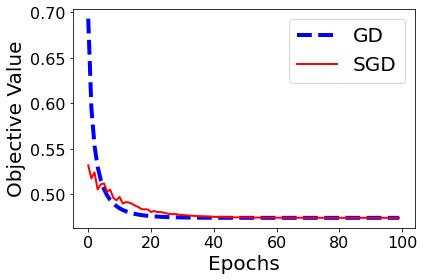

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_gd = range(len(objvals_gd))
epochs_sgd = range(len(objvals_sgd))

line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
line1, = plt.plot(epochs_sgd, objvals_sgd, '-r', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1], ['GD', 'SGD'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_gd_sgd.pdf', format='pdf', dpi=1200)

# 5. Prediction

In [ ]:
# Predict class label
# Inputs:
#     w: d-by-1 matrix
#     X: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    xw = numpy.dot(X, w)
    f = numpy.sign(xw)
    return f

In [ ]:
# evaluate training error
f_train = predict(w, x_train)
diff = numpy.abs(f_train - y_train) / 2
error_train = numpy.mean(diff)
print('Training classification error is ' + str(error_train))

Training classification error is 0.225


In [ ]:
# evaluate test error
f_test = predict(w, x_test)
diff = numpy.abs(f_test - y_test) / 2
error_test = numpy.mean(diff)
print('Test classification error is ' + str(error_test))

Test classification error is 0.1953125


# 6. Mini-batch SGD (fill the code)



## 6.1. Compute the objective $Q_I$ and its gradient using a batch of samples

Define $Q_I (w) = \frac{1}{b} \sum_{i \in I} \log \Big( 1 + \exp \big( - y_i x_i^T w \big) \Big) + \frac{\lambda}{2} \| w \|_2^2 $, where $I$ is a set containing $b$ indices randomly drawn from $\{ 1, \cdots , n \}$ without replacement.

The stochastic gradient at $w$ is $g_I = \frac{\partial Q_I }{ \partial w} = \frac{1}{b} \sum_{i \in I} \frac{- y_i x_i }{1 + \exp ( y_i x_i^T w)} + \lambda w$.

In [ ]:
def mb_stochastic_objective_gradient(w,xi,yi,lam,b):
    # Fill the function 
    # Follow the implementation of stochastic_objective
    # Use matrix-vector multiplication; do not use FOR LOOP of vector-vector multiplication
    n=xi.shape[0]
    
    
    yx=yi*xi # 1-by-d matrix
    yxw=float(numpy.dot(yx,w)) #scalar
    
    # calculate objective function Q_I
    loss = numpy.log(1+numpy.exp(-yxw)) # scalar
    reg = lam/2*numpy.sum(w*w) # scalar
    loss = numpy.mean(loss) #b-by-1 matrix
    obj = loss+reg
    
    #calculate stochastic gradient 
    g_loss = numpy.mean(-yx.T/(1+numpy.exp(yxw))) # b-by-1 matrix
    g = g_loss+lam*w
    return obj,g

In [ ]:
# Mini-Batch SGD for solving logistic regression
# Inputs:
#     x: b-by-d matrix
#     y: b-by-1 matrix
#     lam: scalar, the regularization parameter
#     b: integer, the batch size
#     stepsize: scalar
#     max_epoch: integer, the maximal epochs
#     w: d-by-1 matrix, initialization of w
# Return:
#     w: the solution
#     objvals: record of each iteration's objective value
def mb_sgd(x, y, lam, b, stepsize, max_epoch=100, w=None):
    # Fill the function
    # Follow the implementation of sgd
    # Record one objective value per epoch (not per iteration!)
    n=x.shape[0]
    b=n/b
    objvals=numpy.zeros(max_epoch) #store the objective values
    if w is None:
        w=numpy.zeros((d,1)) # zero initialization
    
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices=numpy.random.permutation(n)
        x_rand=x[rand_indices,:]
        y_rand=y[rand_indices,:]
        
        objval=0 # accumulate the objective values
        for i in range(n):
            xi=x_rand[i,:]
            yi=float(y_rand[i,:]) #scalar
            obj,g=mb_stochastic_objective_gradient(w,xi,yi,lam,b)
            objval +=obj
            w -=stepsize*g
        
        stepsize *=0.9 # decrease step size
        objval /= n
        objvals[t] = objval
        print("Objective value at epoch t=" + str(t) + 'is ' + str(objval))
        
    
    return w, objvals

## 6.2. Implement mini-batch SGD

Hints:
1. In every epoch, randomly permute the $n$ samples (just like SGD).
2. Each epoch has $\frac{n}{b}$ iterations. In every iteration, use $b$ samples, and compute the gradient and objective using the ``mb_stochastic_objective_gradient`` function. In the next iteration, use the next $b$ samples, and so on.


In [ ]:
# Mini-Batch SGD for solving logistic regression
# Inputs:
#     x: b-by-d matrix
#     y: b-by-1 matrix
#     lam: scalar, the regularization parameter
#     b: integer, the batch size
#     stepsize: scalar
#     max_epoch: integer, the maximal epochs
#     w: d-by-1 matrix, initialization of w
# Return:
#     w: the solution
#     objvals: record of each iteration's objective value
def mb_sgd(x, y, lam, b, stepsize, max_epoch=100, w=None):
    # Fill the function
    # Follow the implementation of sgd
    # Record one objective value per epoch (not per iteration!)
    n=x.shape[0]
    b=n/b
    objvals=numpy.zeros(max_epoch) #store the objective values
    if w is None:
        w=numpy.zeros((d,1)) # zero initialization
    
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices=numpy.random.permutation(n)
        x_rand=x[rand_indices,:]
        y_rand=y[rand_indices,:]
        
        objval=0 # accumulate the objective values
        for i in range(n):
            xi=x_rand[i,:]
            yi=float(y_rand[i,:]) #scalar
            obj,g=mb_stochastic_objective_gradient(w,xi,yi,lam,b)
            objval +=obj
            w -=stepsize*g
        
        stepsize *=0.9 # decrease step size
        objval /= n
        objvals[t] = objval
        print("Objective value at epoch t= " + str(t) + ' is ' + str(objval))
        
    
    return w, objvals

<ipython-input-157-9b8d8f4cdfb5>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
<ipython-input-157-9b8d8f4cdfb5>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line1, = plt.plot(epochs_sgd, objvals_sgd, '-r', LineWidth=2)
<ipython-input-157-9b8d8f4cdfb5>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', FontSize=20)
<ipython-input-157-9b8d8f4cdfb5>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Objective Value', FontSize=20)
<ipython-input-157-9b8d8f4cdfb5>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecate

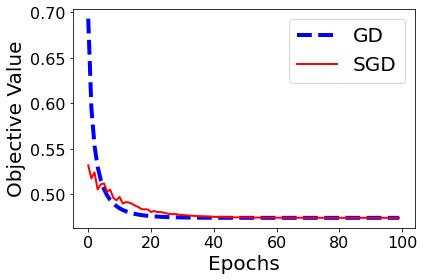

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_gd = range(len(objvals_gd))
epochs_sgd = range(len(objvals_sgd))

line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
line1, = plt.plot(epochs_sgd, objvals_sgd, '-r', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1], ['GD', 'SGD'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_gd_sgd.pdf', format='pdf', dpi=1200)

## 6.3. Run MB-SGD

In [ ]:
# MB-SGD with batch size b=8
lam = 1E-6 # do not change
b = 8 # do not change
stepsize = 0.1 # you must tune this parameter

w, objvals_mbsgd8 = mb_sgd(x_train, y_train, lam, b, stepsize)

Objective value at epoch t= 0 is 0.6637869607341179
Objective value at epoch t= 1 is 0.6588502286581398
Objective value at epoch t= 2 is 0.6556821407518034
Objective value at epoch t= 3 is 0.660515437657488
Objective value at epoch t= 4 is 0.6533679742530804
Objective value at epoch t= 5 is 0.6560405881818256
Objective value at epoch t= 6 is 0.6526968245453275
Objective value at epoch t= 7 is 0.6552489218673309
Objective value at epoch t= 8 is 0.6518296060789126
Objective value at epoch t= 9 is 0.6525929787913036
Objective value at epoch t= 10 is 0.6552690839169213
Objective value at epoch t= 11 is 0.6535265319581062
Objective value at epoch t= 12 is 0.6539917113119341
Objective value at epoch t= 13 is 0.6511122958699317
Objective value at epoch t= 14 is 0.6528556148867607
Objective value at epoch t= 15 is 0.6513781086454583
Objective value at epoch t= 16 is 0.6517301147103943
Objective value at epoch t= 17 is 0.6509071629513081
Objective value at epoch t= 18 is 0.6522041974915995
Obje

In [ ]:
# MB-SGD with batch size b=64
lam = 1E-6 # do not change
b = 64 # do not change
stepsize = 0.1 # you must tune this parameter

w, objvals_mbsgd64 = mb_sgd(x_train, y_train, lam, b, stepsize)

Objective value at epoch t= 0 is 0.6623459755689927
Objective value at epoch t= 1 is 0.6551675134062823
Objective value at epoch t= 2 is 0.6590583312823208
Objective value at epoch t= 3 is 0.6592311844964607
Objective value at epoch t= 4 is 0.6547043575358944
Objective value at epoch t= 5 is 0.6592043066804983
Objective value at epoch t= 6 is 0.6573642011246152
Objective value at epoch t= 7 is 0.6571127767656552
Objective value at epoch t= 8 is 0.6529334068127473
Objective value at epoch t= 9 is 0.6537264215407416
Objective value at epoch t= 10 is 0.6536086411762112
Objective value at epoch t= 11 is 0.6523089526318477
Objective value at epoch t= 12 is 0.6541502262777001
Objective value at epoch t= 13 is 0.6526032699559973
Objective value at epoch t= 14 is 0.6533078324936507
Objective value at epoch t= 15 is 0.6523650084872927
Objective value at epoch t= 16 is 0.6526355719035136
Objective value at epoch t= 17 is 0.6523360353784257
Objective value at epoch t= 18 is 0.6518534820004602
Obj

# 7. Plot and compare GD, SGD, and MB-SGD

You are required to compare the following algorithms:

- Gradient descent (GD)

- SGD

- MB-SGD with b=8

- MB-SGD with b=64

Follow the code in Section 4 to plot ```objective function value``` against ```epochs```. There should be four curves in the plot; each curve corresponds to one algorithm.

# Plot GD vs SGD

<ipython-input-160-9b8d8f4cdfb5>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
<ipython-input-160-9b8d8f4cdfb5>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line1, = plt.plot(epochs_sgd, objvals_sgd, '-r', LineWidth=2)
<ipython-input-160-9b8d8f4cdfb5>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', FontSize=20)
<ipython-input-160-9b8d8f4cdfb5>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Objective Value', FontSize=20)
<ipython-input-160-9b8d8f4cdfb5>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecate

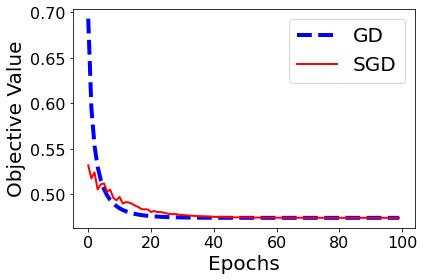

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_gd = range(len(objvals_gd))
epochs_sgd = range(len(objvals_sgd))

line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
line1, = plt.plot(epochs_sgd, objvals_sgd, '-r', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1], ['GD', 'SGD'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_gd_sgd.pdf', format='pdf', dpi=1200)

# Plot GD vs MBSGD8

<ipython-input-161-6b9ff8b53a99>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
<ipython-input-161-6b9ff8b53a99>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line1, = plt.plot(epochs_mbsgd8, objvals_mbsgd8, '-r', LineWidth=2)
<ipython-input-161-6b9ff8b53a99>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', FontSize=20)
<ipython-input-161-6b9ff8b53a99>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Objective Value', FontSize=20)
<ipython-input-161-6b9ff8b53a99>:13: MatplotlibDeprecationWarning: Case-insensitive properties were dep

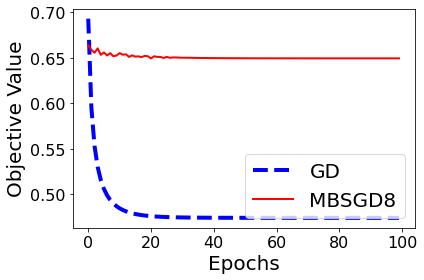

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_gd = range(len(objvals_gd))
epochs_mbsgd8 = range(len(objvals_mbsgd8))

line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
line1, = plt.plot(epochs_mbsgd8, objvals_mbsgd8, '-r', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1], ['GD', 'MBSGD8'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_gd_mbsgd8.pdf', format='pdf', dpi=1200)

# Plot GD vs MBSGD64

<ipython-input-162-cf0765b11f34>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
<ipython-input-162-cf0765b11f34>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line1, = plt.plot(epochs_mbsgd64, objvals_mbsgd64, '-r', LineWidth=2)
<ipython-input-162-cf0765b11f34>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', FontSize=20)
<ipython-input-162-cf0765b11f34>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Objective Value', FontSize=20)
<ipython-input-162-cf0765b11f34>:13: MatplotlibDeprecationWarning: Case-insensitive properties were d

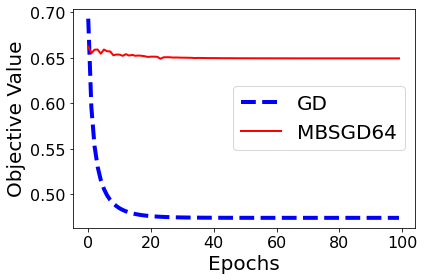

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_gd = range(len(objvals_gd))
epochs_mbsgd64 = range(len(objvals_mbsgd64))

line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
line1, = plt.plot(epochs_mbsgd64, objvals_mbsgd64, '-r', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1], ['GD', 'MBSGD64'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_gd_mbsgd64.pdf', format='pdf', dpi=1200)

# Plot MBSGD8 vs MBSGD64

<ipython-input-163-f3c48e464596>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line0, = plt.plot(epochs_mbsgd8, objvals_mbsgd8, '--b', LineWidth=4)
<ipython-input-163-f3c48e464596>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line1, = plt.plot(epochs_mbsgd64, objvals_mbsgd64, '-r', LineWidth=2)
<ipython-input-163-f3c48e464596>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Epochs', FontSize=20)
<ipython-input-163-f3c48e464596>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Objective Value', FontSize=20)
<ipython-input-163-f3c48e464596>:13: MatplotlibDeprecationWarning: Case-insensitive propertie

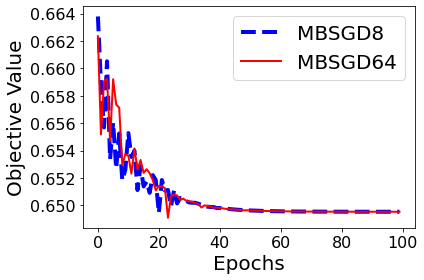

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_mbsgd8 = range(len(objvals_mbsgd8))
epochs_mbsgd64 = range(len(objvals_mbsgd64))

line0, = plt.plot(epochs_mbsgd8, objvals_mbsgd8, '--b', LineWidth=4)
line1, = plt.plot(epochs_mbsgd64, objvals_mbsgd64, '-r', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1], ['MBSGD8', 'MBSGD64'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_mbsgd8_mbsgd64.pdf', format='pdf', dpi=1200)